<a href="https://colab.research.google.com/github/skfo763/Google-ML-Bootcamp-phase1/blob/main/week2/Logistic_Regression_with_a_Neural_Network_mindset_Kor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망을 활용한 로지스틱 회귀
첫 번째 프로그래밍 과제(이자 필수 과제) 에 오신 여러분을 환영합니다! 여러분은 지금부터 고양이를 인식하는 로지스틱 회귀 분류 모델을 만들겁니다. 이 과제는, 인공신경망 방식으로 모델을 학습하는 일련의 과정을 안내하고, 이를 통해 딥러닝에 대한 직관을 연마하도록 해 줄 것입니다.

**안내사항:**
- 명시적으로 사용해도 된다는 등의 다른 지시사항이 없는 경우, 코드에서 반복문 (for / while)을 사용하지 마세요!

**과제를 통해 배울 수 있는 것들:**
- 다음을 포함한 기계학습 알고리즘의 일반적인 구조를 구축합니다:
    - 파라미터 초기화
    - cost function과 gradient의 계산
    - 최적화 알고리즘 사용 (경사 하강법)
- 위 세 가지 기능을 올바른 순서대로 구성하여 메인 모델을 만듭시다.



---



## 1 - 파이썬 패키지들 ##

처음으로, 아래의 코드 블록을 실행시켜 이 과제를 하는동안 필요한 패키지들을 import 해봅시다. 필요한 패키지들의 개략적인 소개는 다음과 같습니다.
- [numpy](www.numpy.org)는 파이썬의 가장 기본적인 과학/수학 연산 관련 패키지입니다.
- [h5py](http://www.h5py.org)는 .h5에 저장된 데이터셋과 상호작용하기 위한 패키지입니다.
- [matplotlib](http://matplotlib.org)은 파이썬 환경에서 그래프를 그릴 수 있도록 해주는 유명한 라이브러리입니다.
- [PIL](http://www.pythonware.com/products/pil/) 과 [scipy](https://www.scipy.org/)는 모든 모델의 학습이 끝난 후, 자기 스스로 가지고 있는 샘플 사진으로 모델을 테스트하는데 사용됩니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline



---



## 2 - 문제(데이터) 셋 개요 ##

**문제 정의** : 주어진 데이터 셋("data.h5")는 다음의 데이터를 포함하고 있습니다.
  - 고양이(y=1) / 고양이가 아님(y=0) 으로 라벨링된 m_train의 이미지 훈련 세트
  - 위와 마찬가지로 라벨링된 m_test의 테스트 세트
  - 각각의 이미지는 (num_px, num_px, 3)의 shape를 가지고, 마지막 숫자 3이 의미하는 바는 색상 채널이 총 3개 (RGB)입니다. 다시말해 각 이미지는 height과 width이 num_px로 모두 같은 정사각형 이미지입니다.

이제 당신은 특정 이미지가 고양이인지 아닌지 여부를 올바르게 분류하는 간단한 이미지 인식 알고리즘을 만들 것입니다.

데이터 셋에 좀 더 익숙해지기 위해, 아래의 코드를 실행시켜 데이터 셋을 로드해봅시다.

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

전처리를 위해, 각각의 이미지 데이터셋 (train: 훈련용, test: 테스트용) 이름 뒤에 "_orig"라는 표기를 붙였습니다. 전처리 이후 실제 훈련과 테스트에 사용되는 train_set_x 와 test_set_x를 얻을 수 있습니다. (라벨링된 데이터인 train_set_y와 test_set_y는 전처리가 필요없습니다)

train_set_x_orig 및 test_set_x_orig의 각 row은 이미지를 나타내는 배열입니다. 아래의 코드를 실행하여 샘플 이미지를 볼 수 있습니다. 다른 샘플 이미지를 보려면 index 값을 변경하고 코드 블록을 다시 실행하세요.

In [ ]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

딥 러닝 학습의 많은 버그들이 행렬/벡터 dimensions을 맞춰주지 않았을 때 발생합니다. 만약 행렬/벡터의 dimension을 올바르게 유지할 수 있다면 버그를 제거하는데 큰 도움이 될 것입니다.

**연습 문제**: 다음 변수의 값을 찾아보세요:
  - m_train (훈련 데이터의 개수)
  - m_test (테스트 데이터의 개수)
  - num_px (훈련 이미지의 높이 = 너비)

train_set_x_orig의 값이 (m_train, num_px, num_px, 3) 의 shape를 하고 있는 numpy-array라는 것을 기억하세요! 다시 말해, 여러분은 train_set_x_orig.shape[0] 이라는 코드를 통해서 m_train의 값을 얻어올 수 있습니다!

In [ ]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = 
m_test = 
num_px = 
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

**모범 답안(m_train, m_test and num_px)**: 
<table style="width:15%">
  <tr>
    <td>m_train</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>

편의를 위해 (num_px, num_px, 3)의 shape를 가진 이미지들을 (num_px * num_px * 3, 1) 의 형태로 재배치(reshape) 해야 합니다. 이 과정을 수행하면 우리의 훈련 및 테스트 데이터셋은 각각의 컬럼이 평평해진(flatten) 형태의 이미지 데이터를 의미하는 numpy-array가 됩니다. 이 배열의 컬럼의 개수는 m_train개가 될 것입니다 (테스트 데이터셋의 경우, m_test개가 되겠죠).


**연습 문제**: 훈련 데이터셋과 테스트 데이터셋을 (num_px, num_px, 3) shape의 행렬에서 (num_px * num_px * 3, 1)의 단순 벡터로 재배치해보세요. 

(a, b, c, d)의 shape를 가진 행렬 X를 (b * c * d, a)로 재배치하기 위해서는 아래의 방법을 사용합니다 :
  `X_flatten = X.reshape(X.shape[0], -1).T     # X.T는 X의 전치 행렬`


In [ ]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = 
test_set_x_flatten =

### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

**모범 답안**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>재배치가 잘 되었는지 검사</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

이미지의 색상을 표현하려면 각 픽셀에 대해 RGB (빨강, 녹색, 파랑 채널)를 지정해야하므로 픽셀 값은 실제로 0에서 255 사이의 세 숫자로 구성된 벡터입니다.

머신 러닝의 일반적인 전처리 단계 중 하나는 데이터 세트를 중앙에 배치하고 표준화하는 것입니다. 즉, 각 샘플에서 전체 numpy 배열의 평균을 뺀 다음 이를 전체 numpy 배열의 표준 편차로 나눕니다. 

그러나 이미지 데이터 세트의 경우 더 간단하고 편리합니다. 데이터 세트의 모든 행을 255 (픽셀 채널의 최대 값)로 나누는 것으로 표준화를 할 수 있습니다.

데이터 세트를 표준화합시다.

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

**<font color='orange'> 기억해야 할 것:**

<font color='orange'>
새로운 데이터셋을 전처리하기 위한 일반적인 방법:

1. <font color='orange'> 주어진 문제(데이터셋)의 dimensions과 shape를 알아낸다 (m_train, m_test, num_px, ...)

2. <font color='orange'> 각 샘플 데이터가 벡터가 되도록 데이터의 세트를 재배치(reshape) 한다. (num_px \* num_px \* 3, 1)

3. <font color='orange'> 데이터를 "표준화" 한다



---



## 3 - 학습 알고리즘의 전반적인 구조 ##

고양이 이미지와 고양이가 아닌 이미지를 구별하는 간단한 알고리즘을 설계해봅시다.

신경망 학습 방식을 사용하여 로지스틱 회귀를 구축합니다. 다음 그림은 **로지스틱 회귀가 왜 매우 단순한 신경망인지를 보여줍니다!**

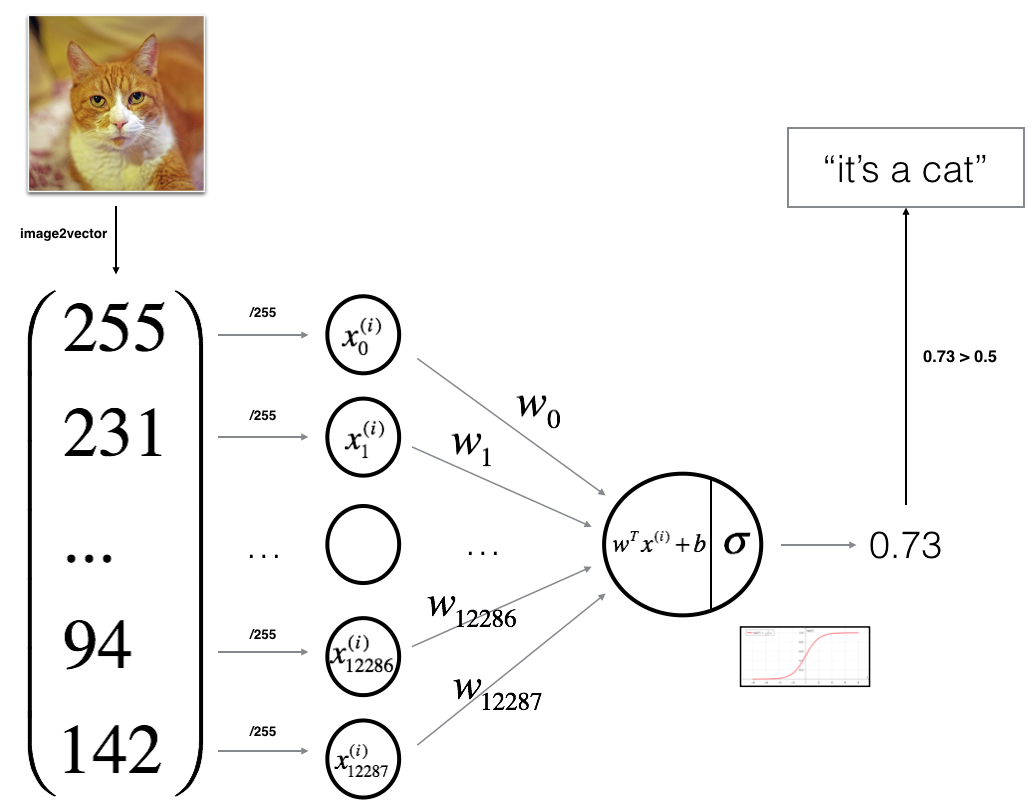


**알고리즘의 수식**:

샘플 데이터 $x^{(i)}$ 에 대하여:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

비용함수는 모든 데이터에 대한 L값을 더한 값입니다.:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**핵심**:
이 연습 단계에서는 아래와 같은 과정을 수행합니다 : 
  - 모델 파라미터(가중치, 절편) 초기화
  - 모델의 비용 함수를 최소화하도록 하는 파라미터를 학습 
  - 학습된 파라미터를 바탕으로 테스트 데이터 셋에 대하여 예측
  - 예측 결과를 분석하고, 결론을 도출



---



## 4 - 알고리즘의 각 부분 만들기 ##

인공 신경망의 주된 세 가지 스텝은 다음과 같습니다 : 
  1. 모델의 구조를 정의한다 (input 특성의 개수 등)
  2. 모델의 파라미터 (가중치 등)를 초기화한다
  3. 반복한다 :
    - 현재의 loss 값을 계산 (forward propagation)
    - 현재의 gradient 값 계산 (backward propagation)
    - 파라미터 업데이트 (gradient descent)

 이 과제에서는 1-3의 과정을 별개로 구현하고, 이후 `model()` 함수 내부에 일련의 과정들을 통합할 것입니다.

### 4-1. Helper functions ###

**연습 문제** : "Python Basics" 과제에서 사용했던 코드를 활용하여, `sigmoid()` 함수를 구현해 봅시다. $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 수식을 구현해야 합니다. `np.exp()` 함수를 사용하면 쉽게 구현할 수 있습니다..



In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 
    ### END CODE HERE ###
    
    return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

**모범 답안**: 

<table>
  <tr>
    <td>sigmoid([0, 2])</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4-2. 파라미터 초기화 ###

**연습 문제** : 파라미터를 초기화하는 아래 코드 블록을 구현해봅시다. 여러분은 맨 처음 가중치 값을 의미하는 0의 값만을 가지는 벡터 w를 초기화해야 합니다. 만약 이를 위한 적절한 numpy 함수를 찾지 못하겠다면, Numpy 라이브러리의 `np.zeros()` 함수의 문서를 참조하세요.

In [ ]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w =
    b =
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

**모범 답안**: 


<table style="width:15%">
    <tr>
        <td>  w(가중치)  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  b(절편)  </td>
        <td> 0 </td>
    </tr>
</table>

이미지 input에 대해서, 가중치 w는 (num_px $\times$ num_px $\times$ 3, 1) 의 shape를 가지는 벡터가 될 것입니다.

### 4-3. Forward / Backward propagation ###

파라미터들이 초기화되었다면, 이제 파라미터들을 학습하기 위해 "forward", "backward" propagation을 수행합니다.

- Forward propagation : 정방향 순전파
- Backward propagation : 오차 역전파

**연습 문제** : cost function(비용 함수)과 gradient를 계산하는 propagate() 함수를 완성하세요

**힌트** : 

Forward Propagation:
- X 행렬에 대하여
- $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$ 를 계산합니다.
- 다음의 cost function을 계산합니다 : $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Backward Propagation: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A =                 # compute activation
    cost =              # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 
    db = 
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

**모범 답안**:

<table style="width:50%">
    <tr>
        <td>  dw  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  db  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  cost  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4-4. 최적화 ###

- 지금까지 초기화된 파라미터를 가지고
- gradient과 cost function을 계산했습니다.
- 이제, 계산된 파라미터들을 업데이트합니다.

**연습 문제** : 최적화를 위해 가중치 등의 파라미터를 업데이트하는 함수를 작성합시다. 목표는 cost function J를 최소화하는 가중치 w와 절편 b를 찾는 것입니다. 파라미터 $\theta$ 에 대해서, $\theta$를 업데이트하는 방법은  $ \theta = \theta - \alpha \text{ } d\theta$ 입니다 $\alpah\는 학습률(learning rate) 입니다.

In [ ]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = 
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = 
        b = 
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> w </td>
       <td>[[ 0.19033591]
 [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> b </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> db </td>
       <td> 0.219194504541 </td>
    </tr>
</table>

**연습 문제** 위의 함수는 학습된 가중치 w와 절편 b를 나타냅니다. 이제 우리는 이 w와 b 값을 활용해 주어진 데이터셋 X에서 라벨 값(고양이인지 아닌지)을 예측할 수 있게 되었습니다.

예측을 담당하는 predict() 함수를 구현해봅시다. 두 가지 스텝이 있습니다.
  1. $\hat{Y} = A = \sigma(w^T X + b)$ 를 계산합니다.

  2. activation 값이 0.5 이하라면 0 - false를, activation 값이 0.5 초과라면 1 - true 값을 리턴합니다. 이 때는 for 루프에서 if/else 문을 사용할 수 있습니다. (물론 이를 따로 벡터화 하는 방법도 있습니다만..) 

In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = 
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        


        
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

**모범 답안**: 

<table style="width:30%">
    <tr>
         <td>
             predictions
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>

**<font color='orange'> 기억해야 할 것:**

<font color='orange'>
지금까지 구현했던 몇 가지의 함수들은 :

1. <font color='orange'> 모델의 파라미터인 w와 b를 초기화

2. <font color='orange'> 반복적으로 loss를 최적화하여 파라미터 w, b를 학습
  1. <font color='orange'> cost와 gradient를 계산
  2. <font color='orange'> 경사 하강법을 사용해 파라미터 업데이트

3. <font color='orange'> 학습된 파라미터 w, b를 사용해 주어진 테스트 데이터에 대한 결과값 예측



---



## 5 - 하나의 모델로 통합 ##

이제 지금까지 구현되었던 모든 코드 들을 올바른 순서로 모아 전체 모델이 어떻게 구성되는지 확인 해봅시다.

**연습 문제** : `model()` 함수를 구현해봅시다. 아래의 표기법을 참조하세요.

- Y_prediction_test는 테스트 데이터 셋에 대한 예측 결과입니다.
- Y_prediction_train는 훈련 데이터 셋에 대한 예측 결과입니다.
- w, costs, grads 는 optimize() 함수의 결과값입니다.

In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = 

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs =
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test =
    Y_prediction_train =

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

**모범 답안**: 

<table style="width:40%"> 
  <tr>
    <td> Cost after iteration 0 </td> 
    <td> 0.693147 </td>
  </tr>
  <tr>
    <td> <center> $\vdots$ </center> </td> 
    <td> <center> $\vdots$ </center> </td> 
  </tr>  
  <tr>
    <td> Train Accuracy </td> 
    <td> 99.04306220095694 % </td>
  </tr>
  <tr>
    <td> Test Accuracy </td> 
    <td> 70.0 % </td>
  </tr>
</table> 

**Comment** : 훈련 정확도는 100 %에 가깝습니다. 모델이 작동하고 있으며 훈련 데이터에 맞을만큼 충분한 용량이 있습니다. 테스트 정확도는 약 70% 입니다. 우리가 사용한 데이터 세트가 작다는 점과, 로지스틱 회귀가 선형 분류라는 점을 감안하면 충분히 만족스러운 결과입니다. 하지만 걱정하지 마세요. 다음 주에 더 나은 분류 모델을 만들 수 있습니다!

또한 모델이 훈련 데이터를 분명히 과대 적합 하고 있음을 알 수 있습니다. 이 과제 후반부에서 정규화를 사용하여 과대 적합을 줄이는 방법을 배웁니다. 

어쨌거나, 아래 코드를 사용하고 인덱스 변수를 변경하면 테스트 세트의 이미지 대한 예측을 볼 수 있습니다.

In [ ]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation** : cost가 지속적으로 감소하는 것을 볼 수 있습니다. 이는 파라미터가 학습되고 있음을 보여줍니다. 그러나 여러분은 훈련 데이터 셋에서 지금보다 더 많이 학습을 수행할 수 있다는걸 볼 수 있습니다. 위의 셀에서 반복 횟수를 늘리고 셀을 다시 실행해보세요. 훈련 세트 정확도는 올라가지만 테스트 세트 정확도는 내려가는 것을 확인할 수 있을 것입니다. 이를 과대 적합이라고합니다.





---




## 6 - 추가적인 분석 (선택 학습 / 채점 안됨)##

첫 번째 이미지 분류 모델을 완성하신걸 축하드립니다! 이제 모델을 좀 더 분석해봅시다. 추가로 살펴볼 사항은 학습률 $\alpha$ 입니다


#### 학습률 선택하기 ####

**참고** :
경사 하강법이 원활하게 작동하도록 하려면 학습률을 잘 선택해야합니다. 학습률 $\alpha$는 파라미터가 업데이트되는 속도를 결정합니다. 학습률이 너무 크면 최적 값을 초과할 수 있고, 너무 작으면 최적값으로 수렴하기 위해 너무 많은 반복이 필요합니다. 그렇기 때문에 잘 조정된 학습률을 사용하는 것이 중요합니다.

앞서 개발한 모델의 학습 곡선을 학습률만 달리 하여 비교해봅시다. 아래 셀을 실행하면 약 1분정도 소요됩니다. 이후 `learning_rates` 변수를 다른 값으로 변경해서 재 실행했을때, 어떤 점이 변화하는지 확인해보세요

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation** :
- 학습률이 다르면 cost가 달라지므로, 예측 결과도 달라집니다.
- 학습률이 너무 크면 cost가 반복 시마다 오르내릴 수 있습니다. (어쨌거나, 이번 case에선 0.01을 사용하더라도 결국 cost 대비 좋은 값이 됩니다)
- 더 낮은 cost가 더 나은 모델을 의미하지는 않습니다. 과대 적합이 있는지 확인해야 합니다. 훈련 정확도가 테스트 정확도보다 훨씬 높을때 발생합니다.
- 딥 러닝에서는 일반적으로 다음을 권장합니다.
  - cost function을 최소화시키는 학습률을 선택하세요
  - 모델이 과대 적합되면 다른 기술을 사용하여 과대 적합을 줄여야 합니다 (이에 대해서는 이후 비디오에서 설명하겠습니다.)



---




## 7 - 자체 이미지를 통한 테스트 (선택 학습 / 채점 안됨) ##

과제를 모두 마치신 것을 축하드립니다! 이제 직접 자신이 가지고 있는 이미지를 가지고 모델의 output을 확인해봅시다. 아래의 방법을 따라해보세요.

1. 이 notebook 의 상단 표시줄에서 "File"을 클릭 후, "open"을 클릭하여 Cousera Hub로 이동합니다.
2. "images" 폴더에 있는 Jupyter Notebook의 디렉토리에 이미지를 추가합니다.
3. 아래 코드에서 이미지 이름을 변경합니다.
4. 코드를 실행하고, 알고리즘이 올바른 결과를 내는지 확인하세요! (1 = 고양이, 0 = 고양이 아님)

In [ ]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

**<font color='orange'>과제를 통해 기억할 것** :

1. <font color='orange'> 데이터 전처리는 매우 중요합니다.
2. <font color='orange'> `initialize()`, `propagate()`, `optimize()` 함수를 각각 구현한 이후, `model()` 함수를 통해서 이를 통합했습니다.
3. <font color='orange'> 학습률 (이는 "하이퍼 파라미터" 의 한 예입니다)을 튜닝하는 것 은 알고리즘에 큰 차이를 불러올 수 있습니다. 이 부분에 대해서는 추후 더 다룰 예정입니다.



마지막으로, 원하신다면 이 노트북에서 다양한 작업을 시도해 보세요. 다만 뭔가 시도하기 전에 반드시 사전에 제출하십시오. 제출한 이후, 다음과 같은 항목을 시도해볼 수 있습니다.

- 다른 학습률과 반복 횟수로 플레이
- 다른 초기화 방법을 시도하고 결과를 비교하십시오.
- 다른 전처리로 테스트합니다 (데이터를 중앙에 배치하거나 각 행을 표준 편차로 나눕니다).



---



참고 문헌 :

- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c